In [1]:
!pip install pyjanitor


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 7.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import janitor

In [3]:
df = pd.read_csv('/content/predictive_maintenance.csv')
df

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [4]:
df = df.clean_names()
df

,udi,product_id,type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,target,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


EDA

In [5]:
df.dtypes.value_counts()

,count
int64,4
object,3
float64,3


In [6]:
df.isna().sum().sum()

np.int64(0)

In [7]:
df.columns

Index(['udi', 'product_id', 'type', 'air_temperature', 'process_temperature',
       'rotational_speed', 'torque', 'tool_wear', 'target', 'failure_type'],
      dtype='object')

In [8]:
df_clean = df.select_dtypes(include='number').copy()
df_clean = df_clean.drop(columns=['udi'])
df_clean.head()

,air_temperature,process_temperature,rotational_speed,torque,tool_wear,target
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0


In [9]:
df_clean.columns

Index(['air_temperature', 'process_temperature', 'rotational_speed', 'torque',
       'tool_wear', 'target'],
      dtype='object')

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
cols = ['air_temperature', 'process_temperature',
       'rotational_speed', 'torque']
target = 'target'
X = df[cols]
y = df[target]

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
# Definir modelos de clasificación
modelos_clasificacion = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "SVM (RBF)": SVC(kernel='rbf'),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [15]:
# Evaluar cada modelo
def evaluar_clasificador(modelo, nombre):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n{nombre}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred))
    return accuracy

In [16]:
# Comparar modelos
resultados_clasificacion = {}
for nombre, modelo in modelos_clasificacion.items():
    resultados_clasificacion[nombre] = evaluar_clasificador(modelo, nombre)

# Mostrar el mejor modelo
mejor_modelo_clasificacion = max(resultados_clasificacion, key=resultados_clasificacion.get)
print(f'\nEl mejor modelo es: {mejor_modelo_clasificacion} con un Accuracy de {resultados_clasificacion[mejor_modelo_clasificacion]:.4f}')



Regresión Logística:
Accuracy: 0.9725
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.64      0.23      0.34        61

    accuracy                           0.97      2000
   macro avg       0.81      0.61      0.66      2000
weighted avg       0.97      0.97      0.97      2000


Random Forest:
Accuracy: 0.9810
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.79      0.51      0.62        61

    accuracy                           0.98      2000
   macro avg       0.89      0.75      0.81      2000
weighted avg       0.98      0.98      0.98      2000


Gradient Boosting:
Accuracy: 0.9785
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.74      0.46      0.57        61

    accuracy                           0.98      2000
   macro avg       

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:53:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<ipython-input-17-7490fcd63bac>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(resultados_clasificacion.keys()), y=list(resultados_clasificacion.values()), palette='mako')


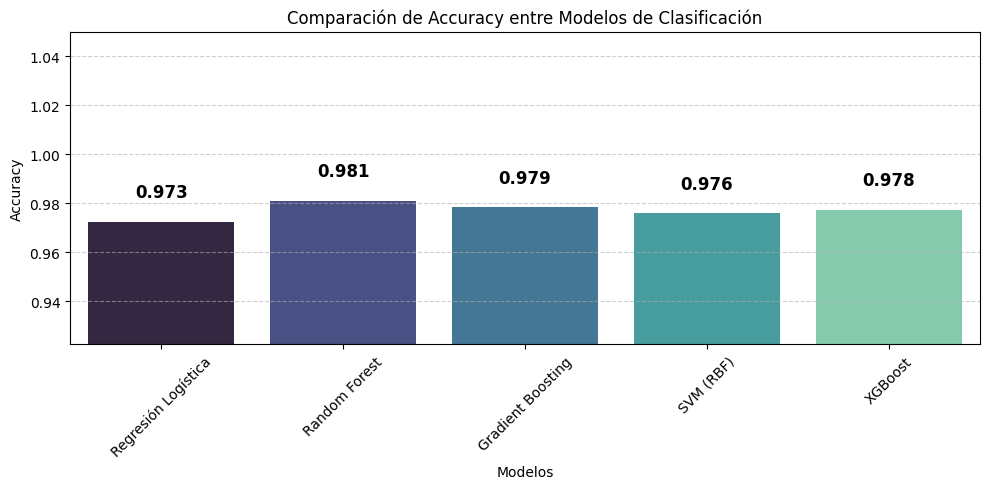

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Comparación del Accuracy entre modelos de clasificación
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list(resultados_clasificacion.keys()), y=list(resultados_clasificacion.values()), palette='mako')

# Agregar etiquetas en cada barra
for index, value in enumerate(resultados_clasificacion.values()):
    ax.text(index, value + 0.01, f'{value:.3f}', ha='center', fontsize=12, fontweight='bold')

plt.ylim(min(resultados_clasificacion.values()) - 0.05, 1.05)
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy entre Modelos de Clasificación')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

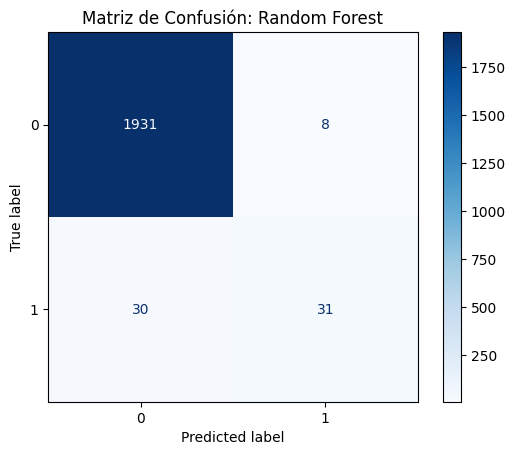

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluación del mejor modelo de clasificación
modelo_clasificacion_seleccionado = modelos_clasificacion[mejor_modelo_clasificacion]
y_pred_clasificacion = modelo_clasificacion_seleccionado.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_clasificacion)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_clasificacion_seleccionado.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Matriz de Confusión: {mejor_modelo_clasificacion}')
plt.show()

In [19]:
import joblib
modelo_seleccionado = modelos_clasificacion[mejor_modelo_clasificacion]
modelo_seleccionado

RandomForestClassifier(random_state=42)

In [20]:
joblib.dump(modelo_seleccionado,'model.pkl')

['model.pkl']

In [21]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [22]:
load_scaler = joblib.load('/content/scaler.pkl')
load_model = joblib.load('/content/model.pkl')

nueva_data = pd.DataFrame([[310, 315.6, 1540, 43.1]], columns=['air_temperature', 'process_temperature',
       'rotational_speed', 'torque'])

nueva_data_scaled = load_scaler.transform(nueva_data)

prediction = load_model.predict(nueva_data_scaled)
print(f'Predicción :  {prediction}')

Predicción :  [0]
